In [1]:
import pandas as pd
from utils import group_experiment_by_amount
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_thresholds = pd.DataFrame(columns=['threshold', 'SD MAE (clipcount)', 'Ours MAE (clipcount)', 'SD MAE (YOLO)', 'Ours MAE (YOLO)', 'SD CLIP', 'Ours CLIP'])
thresholds = [0.2,0.3,0.4,0.5,0.6,0.7]

for threshold in thresholds:
    curr = pd.read_pickle(f"../experiments/dynamic_scale_factor/experiment_dynamic_scale_factor_thresh_{str(threshold).replace('.','')}.pkl")
    curr = curr[curr['is_clipcount'] == True]
    all_thresholds = pd.concat([all_thresholds, pd.DataFrame
    ([
        {
            "threshold" : threshold,
            'SD MAE (clipcount)' : curr['sd_count_diff'].mean(),
            'Ours MAE (clipcount)' : curr['sd_optimized_count_diff'].mean(),
            'SD MAE (YOLO)' : curr[curr['is_yolo'] == True]['sd_count_diff2'].mean(),
            'Ours MAE (YOLO)' : curr[curr['is_yolo'] == True]['sd_optimized_count_diff2'].mean(),
            'SD CLIP' : 2.5 * curr['actual_relevance_score'].abs().mean(),
            'Ours CLIP' : 2.5 * curr['optimized_relevance_score'].abs().mean()
        }
    ])], ignore_index=True)
    
all_thresholds

C:\Users\ozzafar\AppData\Local\Temp\ipykernel_19524\1061839118.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_thresholds = pd.concat([all_thresholds, pd.DataFrame


,threshold,SD MAE (clipcount),Ours MAE (clipcount),SD MAE (YOLO),Ours MAE (YOLO),SD CLIP,Ours CLIP
0,0.2,20.689931,18.495025,15.177778,10.155556,0.743864,0.744793
1,0.3,21.103234,15.382917,15.177778,6.977778,0.744133,0.744928
2,0.4,21.103234,17.688358,15.177778,9.066667,0.744133,0.744233
3,0.5,21.103234,17.737352,15.177778,8.400000,0.744133,0.744950
4,0.6,21.103234,24.386173,15.177778,11.733333,0.744133,0.735233
5,0.7,21.103234,25.280816,15.177778,13.555556,0.744133,0.747972


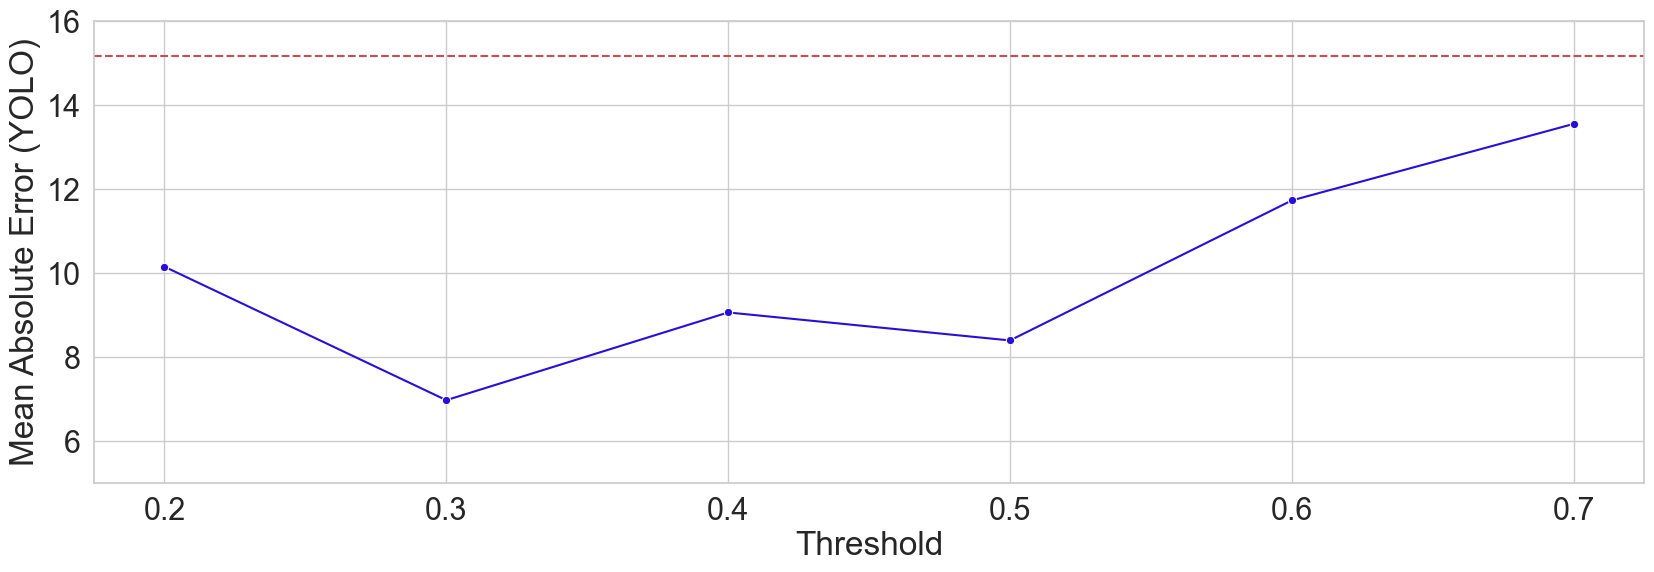

In [3]:
ours_maes = []
sd_mae = None

for i, _lambda in enumerate(thresholds):
    df = all_thresholds.loc[i]
    ours_maes.append(df['Ours MAE (YOLO)'].mean())
    sd_mae = df['SD MAE (YOLO)'].mean()

sns.set(style="whitegrid", font_scale=2)
plt.figure(figsize=(20, 6))
plt.xlabel('Threshold')
plt.ylabel('Mean Absolute Error (YOLO)')
# plt.title('Threshold vs MAE')

# Create a scatter plot
sns_plot = sns.lineplot(x=thresholds, y=ours_maes, marker='o', linestyle='-', color='#270fd9')
# sns_plot.set_xscale('log')
sns_plot.set_ylim(5, 16)

plt.axhline(y=sd_mae, color='r', linestyle='--')

# Show the plot
plt.savefig('../figures/thresh_vs_mae.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
best_threshold_index = all_thresholds["Ours MAE (YOLO)"].idxmin()
best_threshold = thresholds[best_threshold_index]
best_threshold

0.3

In [5]:
best_threshold_df = pd.read_pickle(f"../experiments/dynamic_scale_factor/experiment_dynamic_scale_factor_thresh_{str(best_threshold).replace('.','')}.pkl")
best_threshold_df = best_threshold_df[best_threshold_df['is_clipcount'] == True]
group_experiment_by_amount(best_threshold_df)

,amount,SD MAE (clipcount),Ours MAE (clipcount),SD MAE (YOLO),Ours MAE (YOLO),SD CLIP,Ours CLIP
0,5,4.906011,16.057946,4.6,2.133333,0.758200,0.753500
1,15,23.152459,10.843731,18.733333,8.333333,0.741333,0.744600
2,25,35.251232,19.247074,22.2,10.466667,0.732867,0.736683


In [6]:
df = pd.DataFrame(columns=['SD MAE (clipcount)', 'Ours MAE (clipcount)', 'SD MAE (YOLO)', 'Ours MAE (YOLO)', 'SD CLIP', 'Ours CLIP'])
experiment_names = [
    "experiment_dynamic_scale_factor_thresh_03",
    "experiment_dynamic_scale_factor_thresh_03_lambda_0_lr_01_no_forward",
    "experiment_dynamic_scale_factor_thresh_03_lambda_5_lr_01",
    "experiment_dynamic_scale_factor_thresh_03_lambda_5_lr_01_no_forward"
]

for experiment_name in experiment_names:
    curr = pd.read_pickle(f"../experiments/dynamic_scale_factor/{experiment_name}.pkl")
    curr = curr[curr['is_clipcount'] == True]
    df = pd.concat([df, pd.DataFrame
    ([
        {
            "name" : experiment_name,
            'SD MAE (clipcount)' : curr['sd_count_diff'].mean(),
            'Ours MAE (clipcount)' : curr['sd_optimized_count_diff'].mean(),
            'SD MAE (YOLO)' : curr[curr['is_yolo'] == True]['sd_count_diff2'].mean(),
            'Ours MAE (YOLO)' : curr[curr['is_yolo'] == True]['sd_optimized_count_diff2'].mean(),
            'SD CLIP' : 2.5 * curr['actual_relevance_score'].abs().mean(),
            'Ours CLIP' : 2.5 * curr['optimized_relevance_score'].abs().mean()
        }
    ])], ignore_index=True)
    
df

C:\Users\ozzafar\AppData\Local\Temp\ipykernel_19524\2472955055.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame


,SD MAE (clipcount),Ours MAE (clipcount),SD MAE (YOLO),Ours MAE (YOLO),SD CLIP,Ours CLIP,name
0,21.103234,15.382917,15.177778,6.977778,0.744133,0.744928,experiment_dynamic_scale_factor_thresh_03
1,21.103234,17.292042,15.177778,7.688889,0.744133,0.750961,experiment_dynamic_scale_factor_thresh_03_lamb...
2,21.103234,16.314123,15.177778,9.577778,0.744133,0.751311,experiment_dynamic_scale_factor_thresh_03_lamb...
3,21.103234,15.036501,15.177778,8.177778,0.744133,0.751606,experiment_dynamic_scale_factor_thresh_03_lamb...


Insights:
1. setting yolo threshold 0.3 has most Quantitative results, though 0.5 has best Qualitative results (dynamic_scale_factor_thresh_05)
2. integrating clip doesn't help
3. remove forward isn't consistent

# Dynamic outperforms static (qualitative)

In [7]:
static_threshold_df = pd.read_pickle(f"../experiments/large/experiment_5lambda01lr_large.pkl")
dynamic_threshold_df = pd.read_pickle(f"../experiments/large/experiment_dynamic_scale_factor_03thresh5lambda01lr_large.pkl")

static_threshold_df['id'] = static_threshold_df['class'].astype(str) + static_threshold_df['amount'].astype(str)
dynamic_threshold_df['id'] = dynamic_threshold_df['class'].astype(str) + dynamic_threshold_df['amount'].astype(str)

merged_df = pd.merge(static_threshold_df, dynamic_threshold_df, on='id', suffixes=('_static', '_dynamic'))
merged_df = merged_df[merged_df['sd_optimized_count_diff2_dynamic'] < 10]
merged_df = merged_df[merged_df['amount_dynamic'] < 5]
merged_df = merged_df[merged_df["is_yolo_static"]==True]
merged_df['difference'] = merged_df['sd_optimized_count_diff2_static']-merged_df['sd_optimized_count_diff2_dynamic']

sorted_df = merged_df.sort_values(by='difference', ascending=False)
sorted_df[['id','difference','sd_optimized_count2_static','sd_optimized_count2_dynamic']]

,id,difference,sd_optimized_count2_static,sd_optimized_count2_dynamic
175,car1,20,22,0
100,book1,19,22,3
176,car2,10,13,3
203,chair4,8,12,4
216,cow1,7,17,10
...,...,...,...,...
177,car3,-1,3,2
218,cow3,-1,7,8
78,boat4,-2,5,7
2,apple3,-2,3,5


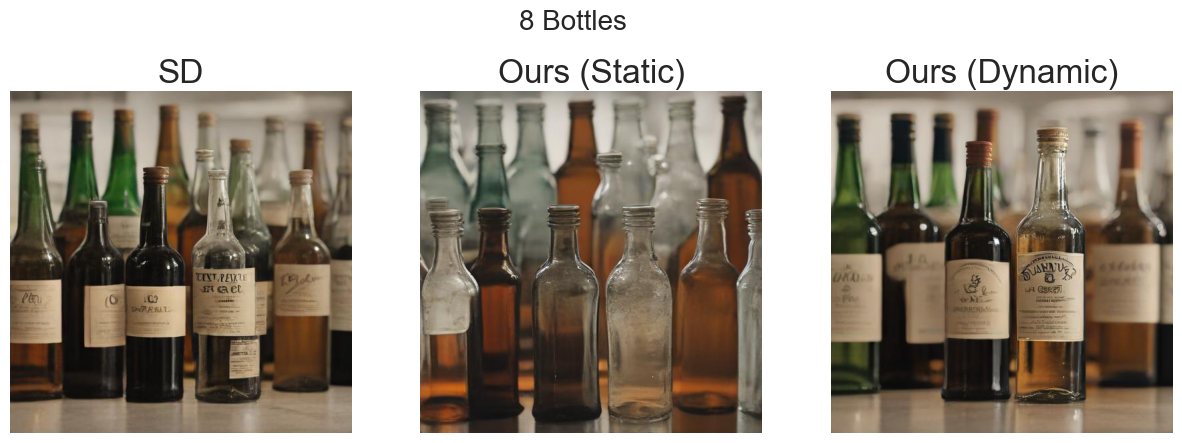

In [8]:
from matplotlib import image as mpimg

path = "../img/dynamic_thresh_superior/bottles2/"

# List of image paths
image_paths = [path + "actual.jpg", path + "static.jpg", path + "dynamic.jpg"]
titles = ['SD', 'Ours (Static)', 'Ours (Dynamic)']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop over image paths and axes to plot the images
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(image_paths[i])
    ax.imshow(img)
    ax.set_title(titles[i], fontsize=24)  # Set the title for each image
    ax.axis('off')  # Hide the axis

# Adjust layout
# plt.tight_layout()

fig.suptitle('8 Bottles', fontsize=20, y=1)

# Show the figure
plt.show()